# Understanding K-Means Clustering Algorithm
#### Kathirmani Sukumar  (Data Scientist @Gramener, [www.skathirmani.com](http://skathirmani.com))

This article is primarily based on [this](http://dni-institute.in/blogs/k-means-clustering-algorithm-explained/)

To be added
* How to classify new data after fitting
* How to check the accuracy of the model
* How to fine tune the parameters for better results

#### Note
Please reach out to me if you have any suggestions or if there is any issues

### Introduction
k-means clustering aims to partition `n` observations into `k` clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. 
![sample](k-means-clusters-example.png)

In [1]:
import time
%matplotlib inline
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Lets simulate two set of clusters `cluster_1` and `cluster_2` with different averages. If we look at the plot below, we can observe that there are two set of clusters.

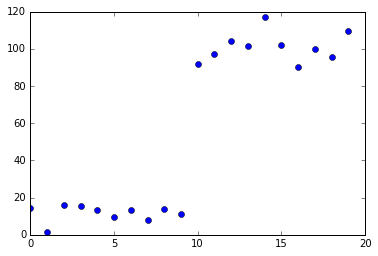

In [2]:
cluster_1 = np.random.normal(10, 5, 10)
cluster_2 = np.random.normal(100, 10, 10)
data = np.hstack([cluster_1, cluster_2])
timestamp = range(len(data))
fig = plt.figure()
plt.plot(timestamp, data, 'bo')

First lets use the `k-means` algorithm from `sklearn.cluster`. All we need to do is to initialize `KMean` class with number of clusters we want. Deciding the number of clusters is the very important aspect. Clustering results will be primarily driven by this parameter. Later we will see how to optimally decide the number of clusters. As of now lets go with 2 clusters. Once we have instance of `KMeans`, we need to pass the data with the timestamp to `kmean.fit`.

In [5]:
data_kmeans = np.column_stack([timestamp, data])
kmeans = KMeans(n_clusters=2)
fit = kmeans.fit(data_kmeans)

Thats its...!!! We have computed the centroids for the clusters. Since we initiated the kmeans instance with 2 clusters, we should have two centroids. The `x` & `y` co-ordinates values of these two centroids can be retrieved using `kmeans.cluster_centers_`. 

In [6]:
centroids_sklearn = kmeans.cluster_centers_
centroids_sklearn

array([[ 14.5       ,  97.52227037],
       [  4.5       ,   6.21119596]])

To better understand the results of k-means, we can add these centroids to the plot we created earlier

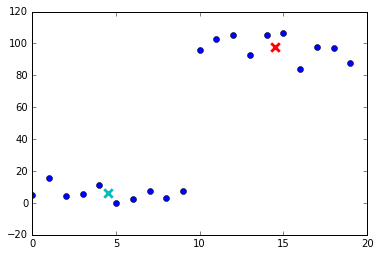

In [7]:
plt.plot(timestamp, data, 'bo')
plt.plot(centroids_sklearn[0][0], centroids_sklearn[0][1], 'rx', mew=12, ms=2)
plt.plot(centroids_sklearn[1][0], centroids_sklearn[1][1], 'cx', mew=12, ms=2)

### K-Means from the scratch
Lets try to write the code for k-means algorithm from scratch. Remember this will work only for two dimension. And also it is just an attempt to understand the algorithm programatically. It doesn't handle any edge cases.

The below piece of code is based on the following approach

* Initialize the initial centroids. In our case we are taking the minimum and maximum data point that is available in the data.
* Follow these steps for each data point:
    * Calculate the euclidean distance between the data point and each centroid separately
    * Identify the nearest centroid and categorize the data point under respective cluster
    * Recalucate the centroids by computing the average of the datapoints under each cluster
* After looping in to all the data points, we will have the updated and final centriods for each cluster

Run the below cell, to see how the centroids are moving for each iteration.

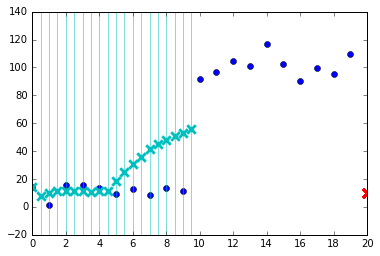

In [8]:
euc_distance = lambda x, y, centroid: np.sqrt((x-centroid[0])**2 + (y-centroid[1])**2)
update_avgs = lambda buc: [ np.mean([int(i[0]) for i in buc]), np.mean([int(i[1]) for i in buc])]

plt.plot(data, 'bo')
plt.locator_params(axis='x',nbins=10)


centroids = [(0,0), (20,10)] #Initialize the centroids
bucket_1, bucket_2 = [], [] #Empty buckets for each cluster. 


for x, y in enumerate(data):
    euc_dist1 = euc_distance(x, y, centroids[0]) # Calc euclidean distance between (x,y) and first centroid
    euc_dist2 = euc_distance(x, y, centroids[1]) # Calc euclidean distance between (x,y) and second centroid
    
    # Append the data point to the closest centroid
    if euc_dist1 < euc_dist2:
        bucket_1.append((x, y))
    else:
        bucket_2.append((x, y))
        
    # Recalucate the centroids
    if len(bucket_1):
        centroids[0] = update_avgs(bucket_1)
    if len(bucket_2):
        centroids[1] = update_avgs(bucket_2)
    
    
    # Animate how the mean for each cluster is changing
    for i, centroid in enumerate(centroids):
        plt.plot(centroid[0], centroid[1], 'cx' if i==0 else 'rx', mew=12, ms=2)
        plt.plot([centroid[0],centroid[0]], [-20, 140], 
                 color='c' if i==0 else 'r' ,
                 linestyle='-', linewidth=0.5)
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(0.1)
display.clear_output(wait=True)


If we compare the centroids which we got via `sklearn.cluster` and the one via the above manual method, there is a slight difference. This is because the initial centroids assumptions are different. Using `sklearn.cluster`, we let the algorithm decide the initial clusters. Whereas with the manual approach, we took the minimum and maximum data point. Hence the cluster initial assumption plays a vital role.

In [7]:
print centroids_sklearn
print centroids

[[ 14.5         99.72184279]
 [  4.5         10.59306358]]
[[4.5, 10.199999999999999], [14.5, 99.099999999999994]]


### To be added
* How to classify new data after fitting
* How to check the accuracy of the model
* How to fine tune the parameters for better results